In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IRIS

In [2]:
iris = pd.read_csv('../../results/iris.csv', index_col=0)
iris.head()

ConfidenceFactor  NoGlobalPruning  EarlyStopping  KFolds  NSimulations  \
1              0.01            False          False       2             1   
2              0.01            False          False       2             1   
3              0.01            False           True       2             1   
4              0.01            False           True       2             1   
5              0.01             True          False       2             1   

   Stratified  FoldNumber  FMeasure  
1       False           1  0.956580  
2       False           2  0.943701  
3       False           1  0.935505  
4       False           2  0.960479  
5       False           2  0.948642

In [3]:
groupby_columns = ['MinCases', 'NoGlobalPruning', 'EarlyStopping', 'KFolds', 'Stratified']
iris_mean = iris.groupby(groupby_columns)[['FMeasure']].agg(['mean'])
iris_mean.columns = iris_mean.columns.get_level_values(0)
iris_mean = iris_mean.reset_index()
iris_mean['NoGlobalPruning, EarlyStopping'] = iris_mean[['NoGlobalPruning', 'EarlyStopping']].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)
iris_mean = iris_mean[['NoGlobalPruning, EarlyStopping', 'Stratified', 'KFolds', 'MinCases', 'FMeasure']]
iris_mean.sort_values(by=['FMeasure'])

NoGlobalPruning, EarlyStopping  Stratified  KFolds  ConfidenceFactor  \
163                    False, True        True       2              0.99   
4                     False, False       False       4              0.01   
94                     False, True       False       4              0.50   
98                     False, True       False       6              0.50   
5                     False, False        True       4              0.01   
..                             ...         ...     ...               ...   
213                     True, True        True       9              0.99   
84                    False, False       False       8              0.50   
104                    False, True       False       9              0.50   
215                     True, True        True      10              0.99   
197                    True, False        True      10              0.99   

     FMeasure  
163  0.913503  
4    0.921052  
94   0.922248  
98   0.922583  
5    0.923675  
..        ...  
213  0.949866  
84   0.950691  
104  0.954059  
215  0.954067  
197  0.955418  

[216 rows x 5 columns]

/home/mateusz.baran/anaconda3/envs/induction-of-decision-trees/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


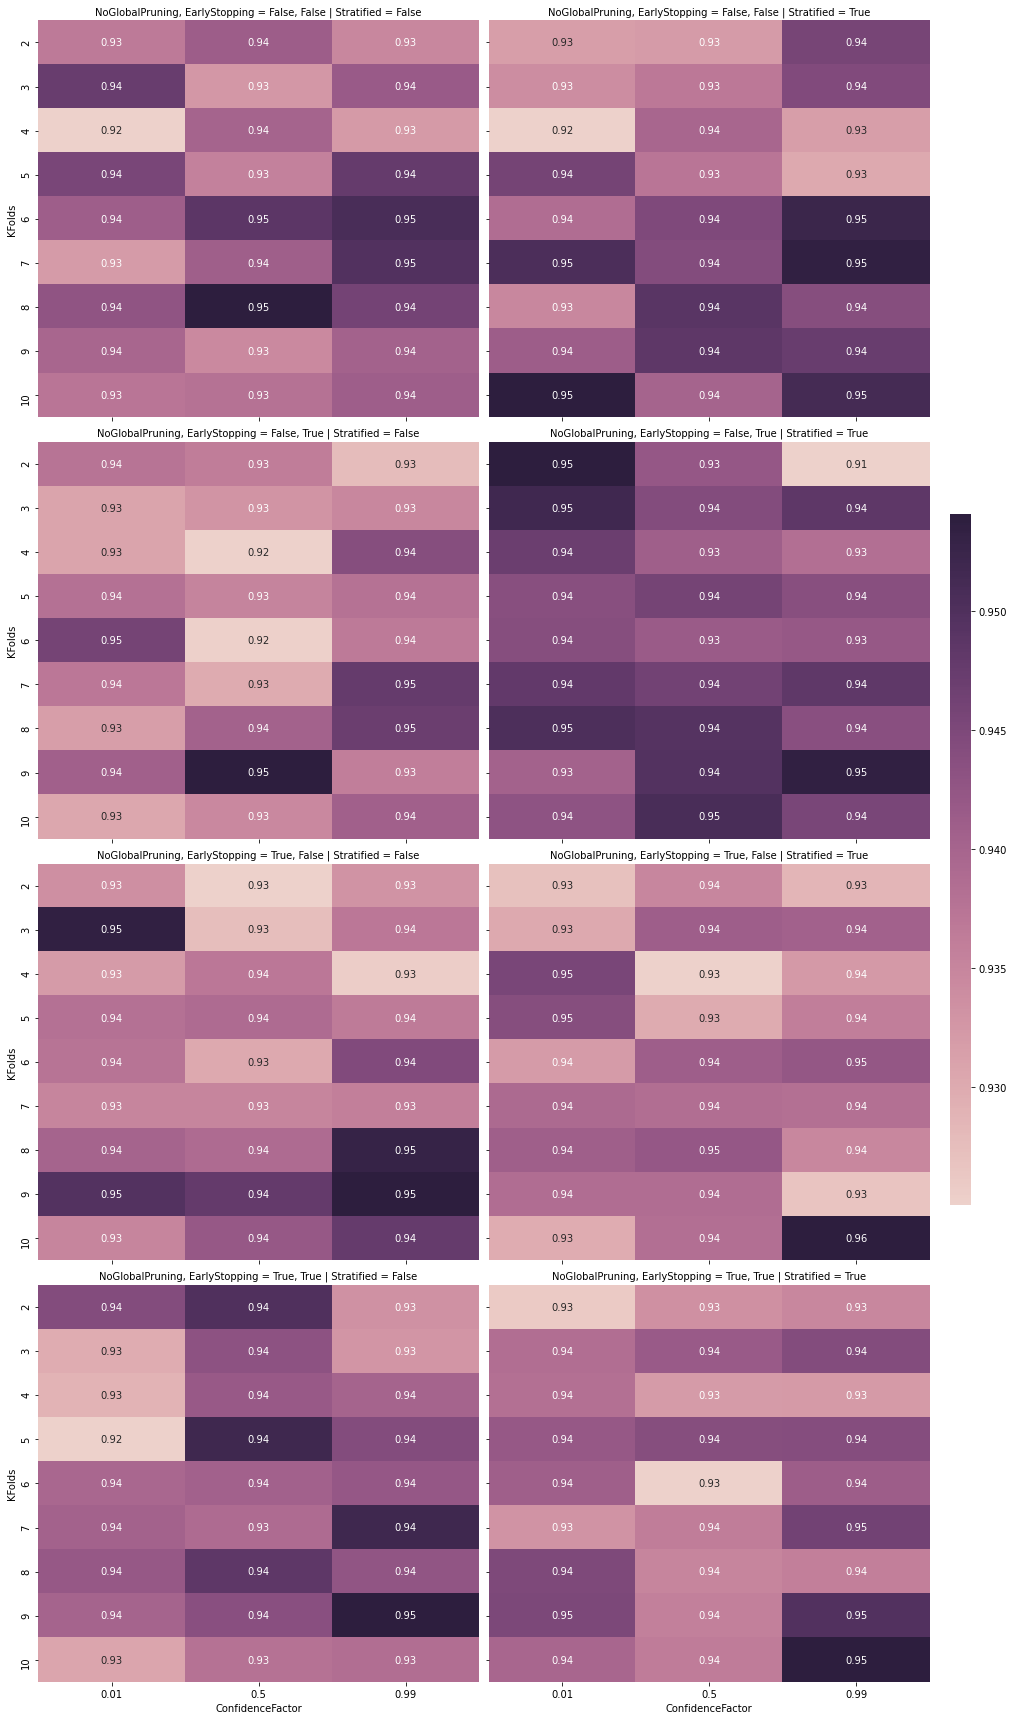

In [4]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(columns=args[0], index=args[1], values=args[2])
    sns.heatmap(d,  **kwargs)


grid = sns.FacetGrid(iris_mean, row='NoGlobalPruning, EarlyStopping', col='Stratified', height=6, aspect=1.2)
grid.fig.set_tight_layout(False)
cbar_ax = grid.fig.add_axes([.92, .3, .02, .4])
grid.map_dataframe(draw_heatmap, 'MinCases', 'KFolds', 'FMeasure', cbar_ax=cbar_ax, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
grid.fig.subplots_adjust(right=.9)

# WINE

In [5]:
wine = pd.read_csv('../../results/wine.csv', index_col=0)
wine.head()

ConfidenceFactor  NoGlobalPruning  EarlyStopping  KFolds  NSimulations  \
1              0.01            False          False       2             1   
2              0.01            False          False       2             1   
3              0.01            False           True       2             1   
4              0.01            False           True       2             1   
5              0.01             True          False       2             1   

   Stratified  FoldNumber  FMeasure  
1       False           1  0.939729  
2       False           2  0.912605  
3       False           2  0.868911  
4       False           1  0.879552  
5       False           2  0.911740

In [6]:
groupby_columns = ['MinCases', 'NoGlobalPruning', 'EarlyStopping', 'KFolds', 'Stratified']
wine_mean = wine.groupby(groupby_columns)[['FMeasure']].agg(['mean'])
wine_mean.columns = wine_mean.columns.get_level_values(0)
wine_mean = wine_mean.reset_index()
wine_mean['NoGlobalPruning, EarlyStopping'] = wine_mean[['NoGlobalPruning', 'EarlyStopping']].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)
wine_mean = wine_mean[['NoGlobalPruning, EarlyStopping', 'Stratified', 'KFolds', 'MinCases', 'FMeasure']]
wine_mean.sort_values(by=['FMeasure'])

NoGlobalPruning, EarlyStopping  Stratified  KFolds  ConfidenceFactor  \
73                    False, False        True       2              0.05   
216                   False, False       False       2              0.25   
18                     False, True       False       2              0.01   
504                   False, False       False       2              0.95   
199                     True, True        True       2              0.10   
..                             ...         ...     ...               ...   
627                    True, False        True       9              0.99   
445                   False, False        True       8              0.90   
321                    False, True        True       9              0.50   
211                     True, True        True       8              0.10   
107                    False, True        True      10              0.05   

     FMeasure  
73   0.887437  
216  0.887697  
18   0.888645  
504  0.888745  
199  0.889819  
..        ...  
627  0.933982  
445  0.934739  
321  0.935377  
211  0.935606  
107  0.936614  

[648 rows x 5 columns]

/home/mateusz.baran/anaconda3/envs/induction-of-decision-trees/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


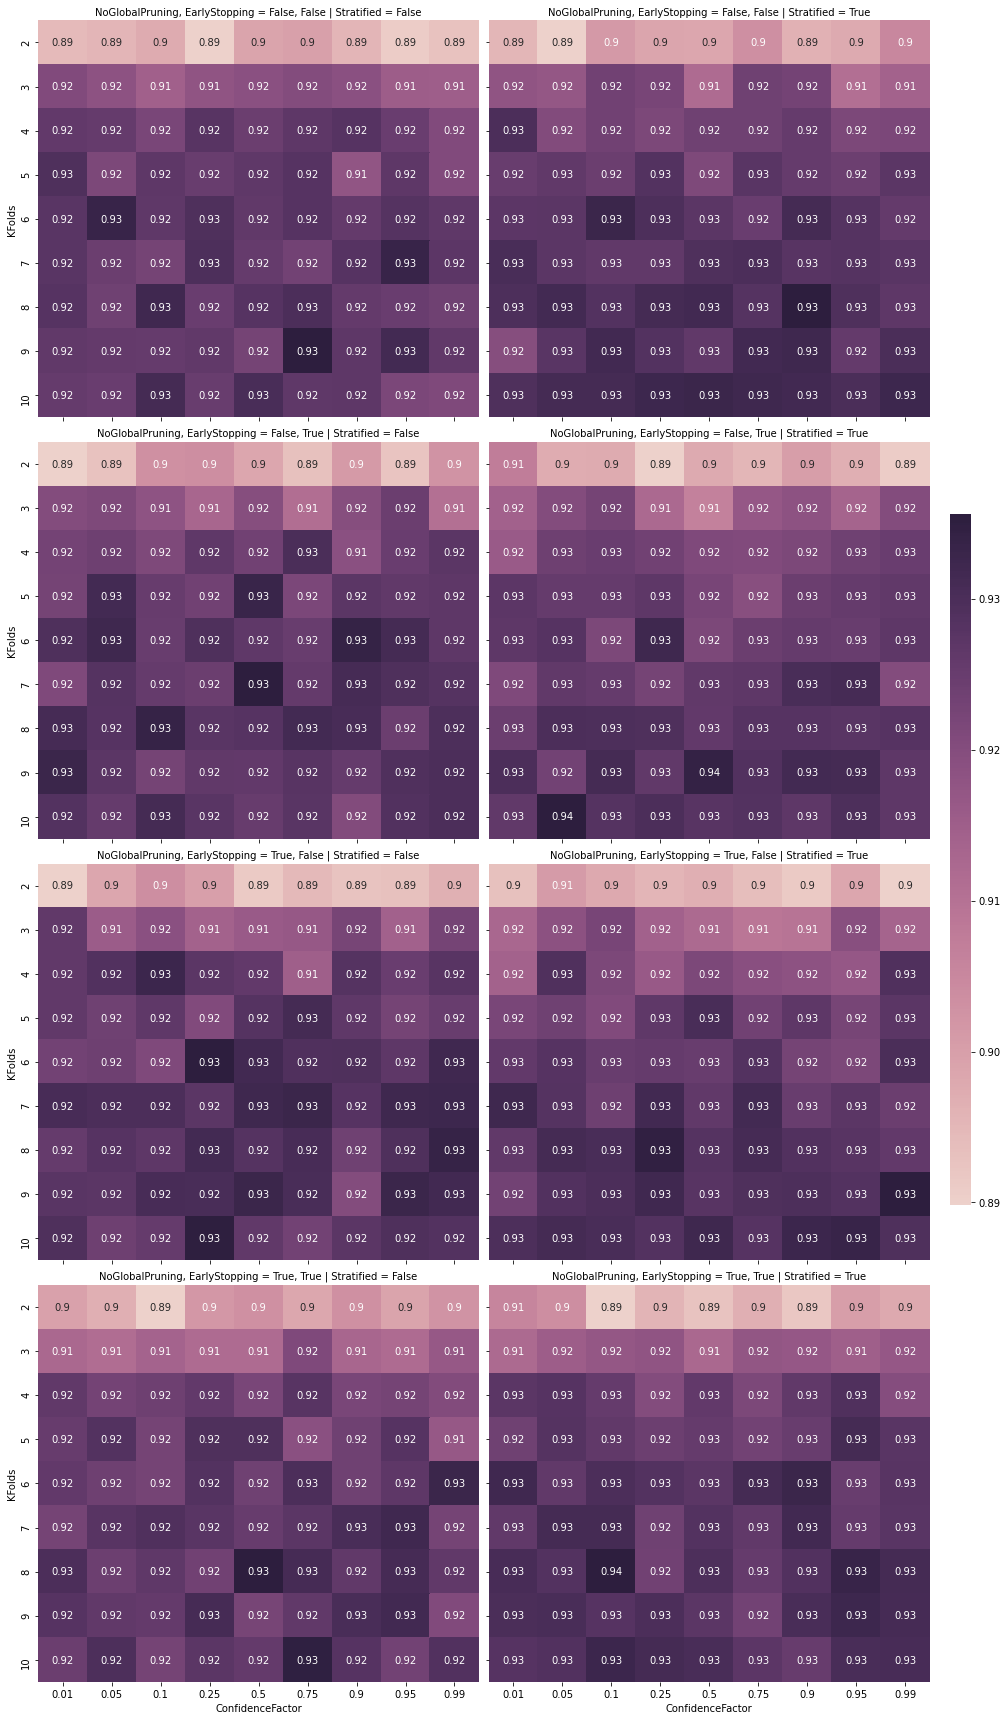

In [7]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(columns=args[0], index=args[1], values=args[2])
    sns.heatmap(d,  **kwargs)


grid = sns.FacetGrid(wine_mean, row='NoGlobalPruning, EarlyStopping', col='Stratified', height=6, aspect=1.2)
grid.fig.set_tight_layout(False)
cbar_ax = grid.fig.add_axes([.92, .3, .02, .4])
grid.map_dataframe(draw_heatmap, 'MinCases', 'KFolds', 'FMeasure', cbar_ax=cbar_ax, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
grid.fig.subplots_adjust(right=.9)
plt.savefig('../../results/plots/wine-heatmap.png')

# GLASS

In [8]:
glass = pd.read_csv('../../results/glass.csv', index_col=0)
glass.head()

ConfidenceFactor  NoGlobalPruning  EarlyStopping  KFolds  NSimulations  \
1              0.01            False          False       2             1   
2              0.01            False          False       2             1   
3              0.01            False           True       2             1   
4              0.01            False           True       2             1   
5              0.01             True          False       2             1   

   Stratified  FoldNumber  FMeasure  
1       False           1  0.594692  
2       False           2  0.648739  
3       False           1  0.429561  
4       False           2  0.569587  
5       False           2  0.513571

In [9]:
groupby_columns = ['MinCases', 'NoGlobalPruning', 'EarlyStopping', 'KFolds', 'Stratified']
glass_mean = glass.groupby(groupby_columns)[['FMeasure']].agg(['mean'])
glass_mean.columns = glass_mean.columns.get_level_values(0)
glass_mean = glass_mean.reset_index()
glass_mean['NoGlobalPruning, EarlyStopping'] = glass_mean[['NoGlobalPruning', 'EarlyStopping']].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)
glass_mean = glass_mean[['NoGlobalPruning, EarlyStopping', 'Stratified', 'KFolds', 'MinCases', 'FMeasure']]
glass_mean.sort_values(by=['FMeasure'])

NoGlobalPruning, EarlyStopping  Stratified  KFolds  ConfidenceFactor  \
158                    False, True       False       9              0.10   
318                     True, True       False       9              0.50   
270                   False, False       False       9              0.50   
46                     True, False       False       9              0.01   
254                     True, True       False       9              0.25   
..                             ...         ...     ...               ...   
201                   False, False        True       6              0.25   
69                    False, False        True       4              0.05   
491                    True, False        True       7              0.95   
311                     True, True        True       5              0.50   
505                     True, True        True       6              0.95   

     FMeasure  
158  0.562624  
318  0.569991  
270  0.570589  
46   0.570680  
254  0.571548  
..        ...  
201  0.671340  
69   0.671628  
491  0.671759  
311  0.672609  
505  0.673078  

[576 rows x 5 columns]

/home/mateusz.baran/anaconda3/envs/induction-of-decision-trees/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


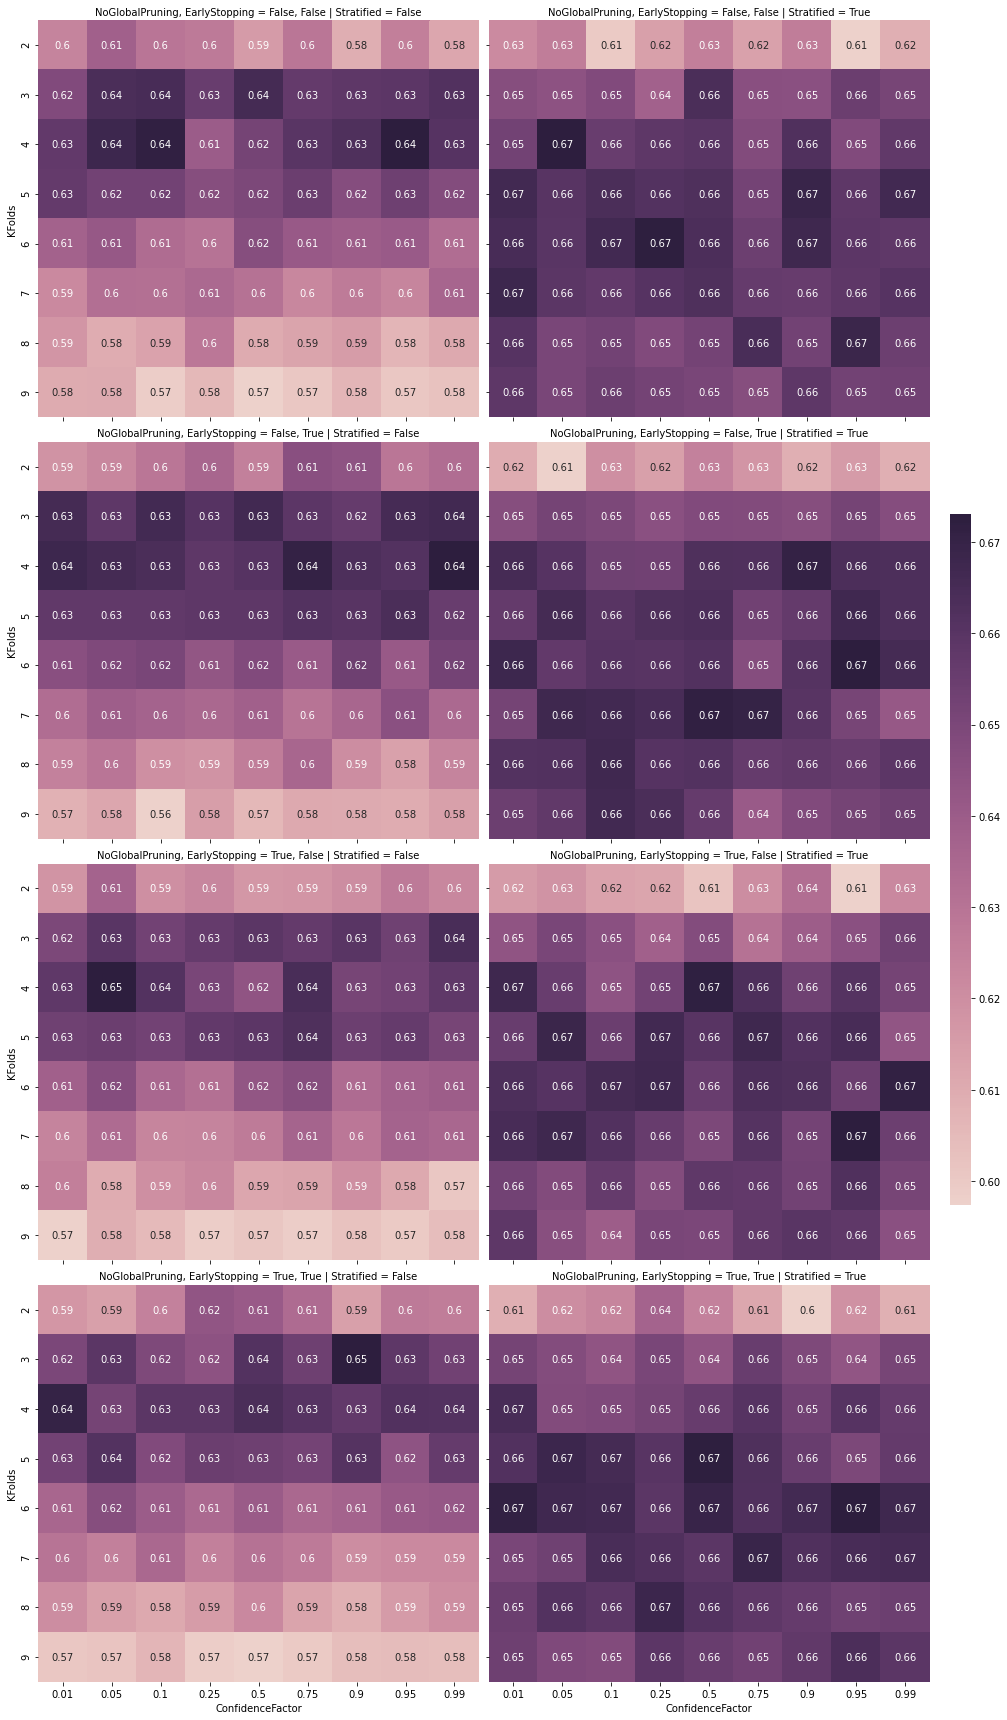

In [10]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(columns=args[0], index=args[1], values=args[2])
    sns.heatmap(d,  **kwargs)


grid = sns.FacetGrid(glass_mean, row='NoGlobalPruning, EarlyStopping', col='Stratified', height=6, aspect=1.2)
grid.fig.set_tight_layout(False)
cbar_ax = grid.fig.add_axes([.92, .3, .02, .4])
grid.map_dataframe(draw_heatmap, 'MinCases', 'KFolds', 'FMeasure', cbar_ax=cbar_ax, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
grid.fig.subplots_adjust(right=.9)
plt.savefig('../../results/plots/glass-heatmap.png')

# SEEDS

In [11]:
seeds = pd.read_csv('../../results/seeds.csv', index_col=0)
seeds.head()

ConfidenceFactor  NoGlobalPruning  EarlyStopping  KFolds  NSimulations  \
1              0.01            False          False       2             1   
2              0.01            False          False       2             1   
3              0.01            False           True       2             1   
4              0.01            False           True       2             1   
5              0.01             True          False       2             1   

   Stratified  FoldNumber  FMeasure  
1       False           1  0.962551  
2       False           2  0.882705  
3       False           1  0.940948  
4       False           2  0.888571  
5       False           1  0.905019

In [12]:
groupby_columns = ['MinCases', 'NoGlobalPruning', 'EarlyStopping', 'KFolds', 'Stratified']
seeds_mean = seeds.groupby(groupby_columns)[['FMeasure']].agg(['mean'])
seeds_mean.columns = seeds_mean.columns.get_level_values(0)
seeds_mean = seeds_mean.reset_index()
seeds_mean['NoGlobalPruning, EarlyStopping'] = seeds_mean[['NoGlobalPruning', 'EarlyStopping']].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)
seeds_mean = seeds_mean[['NoGlobalPruning, EarlyStopping', 'Stratified', 'KFolds', 'MinCases', 'FMeasure']]
seeds_mean.sort_values(by=['FMeasure'])

NoGlobalPruning, EarlyStopping  Stratified  KFolds  ConfidenceFactor  \
504                   False, False       False       2              0.95   
55                      True, True        True       2              0.01   
126                     True, True       False       2              0.05   
577                   False, False        True       2              0.99   
541                    True, False        True       2              0.95   
..                             ...         ...     ...               ...   
121                    True, False        True       8              0.05   
445                   False, False        True       8              0.90   
33                     False, True        True       9              0.01   
223                   False, False        True       5              0.25   
521                   False, False        True      10              0.95   

     FMeasure  
504  0.886587  
55   0.888504  
126  0.888533  
577  0.888552  
541  0.889262  
..        ...  
121  0.914796  
445  0.915093  
33   0.915360  
223  0.916814  
521  0.916976  

[648 rows x 5 columns]

/home/mateusz.baran/anaconda3/envs/induction-of-decision-trees/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


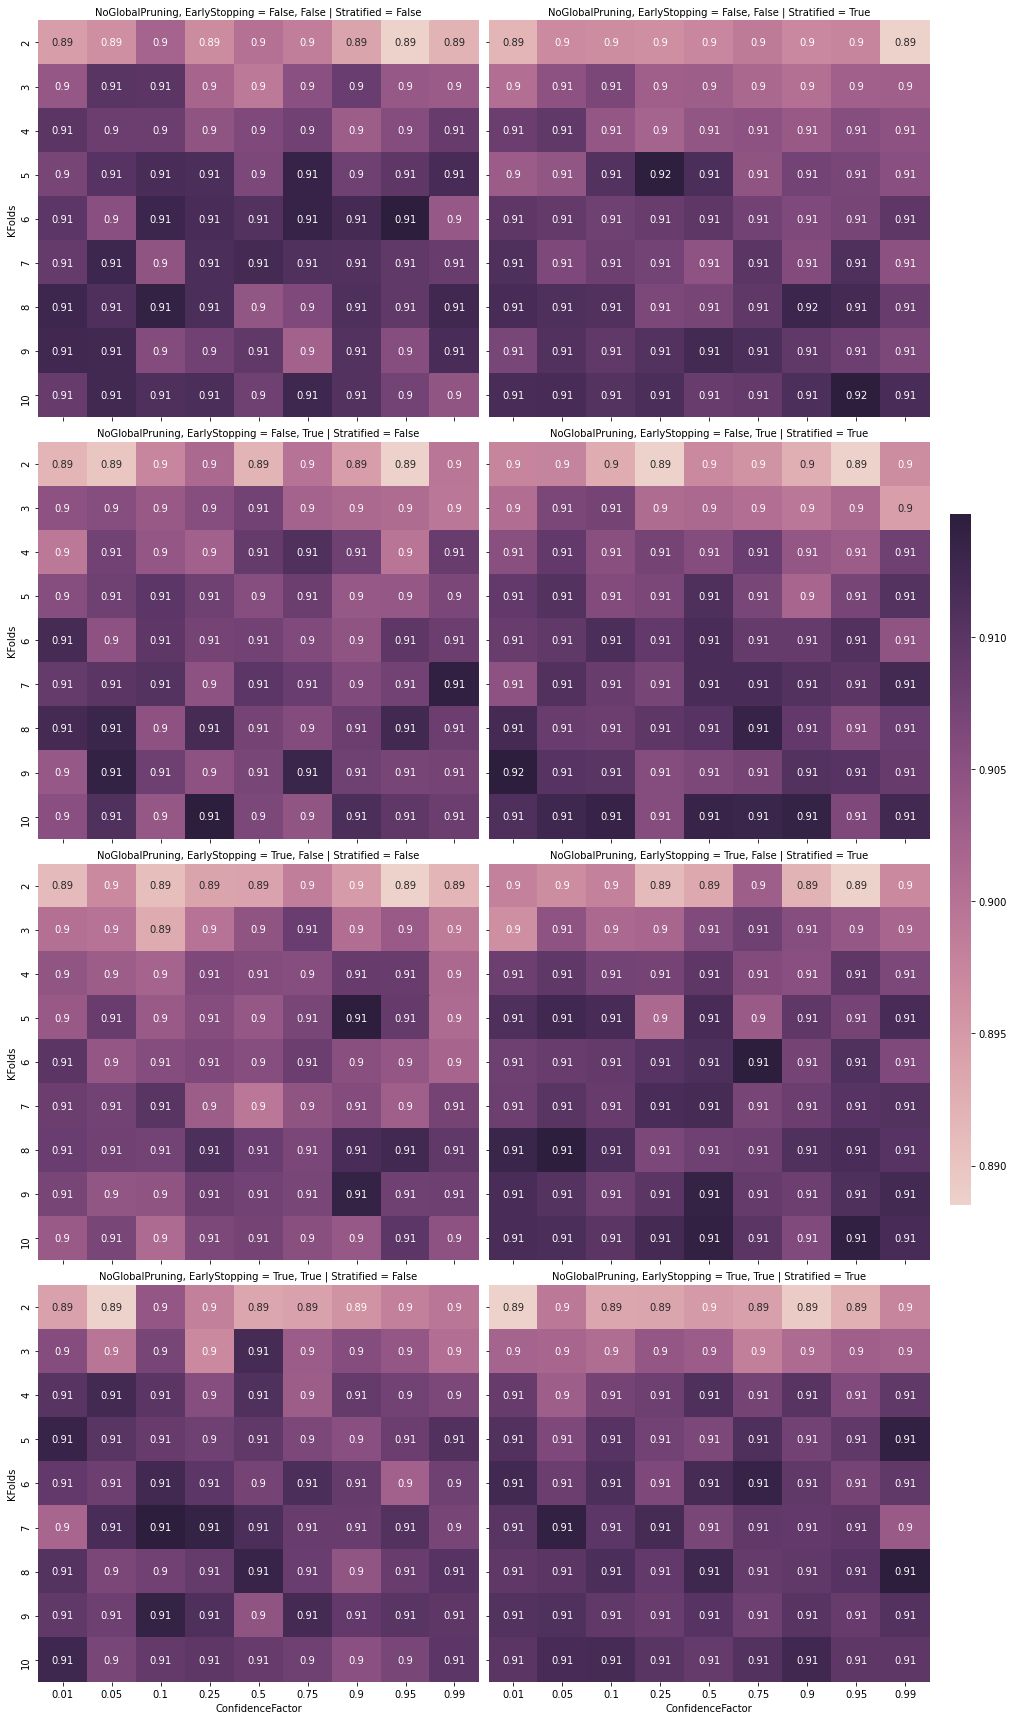

In [13]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(columns=args[0], index=args[1], values=args[2])
    sns.heatmap(d,  **kwargs)


grid = sns.FacetGrid(seeds_mean, row='NoGlobalPruning, EarlyStopping', col='Stratified', height=6, aspect=1.2)
grid.fig.set_tight_layout(False)
cbar_ax = grid.fig.add_axes([.92, .3, .02, .4])
grid.map_dataframe(draw_heatmap, 'MinCases', 'KFolds', 'FMeasure', cbar_ax=cbar_ax, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
grid.fig.subplots_adjust(right=.9)
plt.savefig('../../results/plots/seeds-heatmap.png')